# Introduction to plotting 

In [2]:
import b2plot
import matplotlib.pyplot as plt
%matplotlib inline

For optimal usage set `plt.style.use('belle2')`


In [3]:
plt.style.use('belle2')

In [4]:
%load_ext autoreload
%autoreload 2

### Creating some pseudo data

In [5]:
import pandas as pd
import numpy as np

ns =30000
nb =80000

df = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.normal(0, 0.5, ns))}
df['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df['exp'] = np.random.randint(0,8, ns+nb)
df = pd.DataFrame(df)

df1 = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.random_sample(ns)*7 - 3.5 )}
df1['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df1 = pd.DataFrame(df1)

# Simple Plot

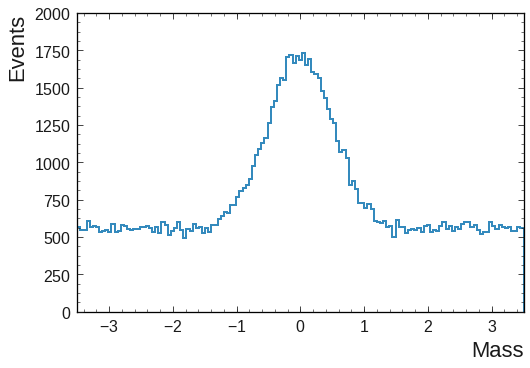

In [6]:
b2plot.hist(df.mass, lw=2)
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

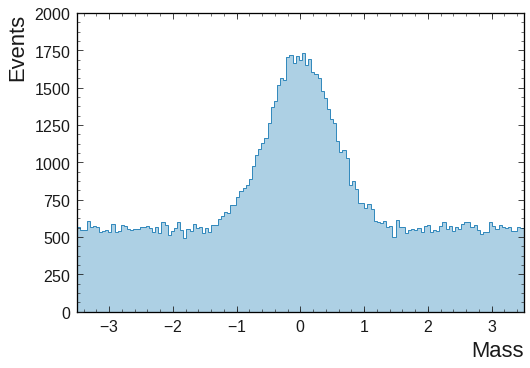

In [7]:
b2plot.figure()
b2plot.hist(df.mass, color=1, style=0)
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

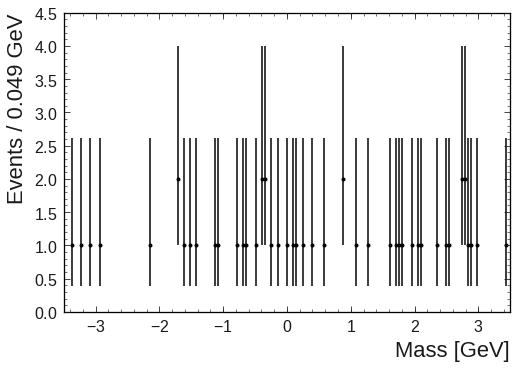

In [8]:
xx = df.sample(50).mass
# b2plot.figure()
b2plot.errorbar(xx, color='black')
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV', root_style=1)

[0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2
 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 2 2 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 2 2 1 1 0 1 0 0 0 0 0 0 0 0 1 0]


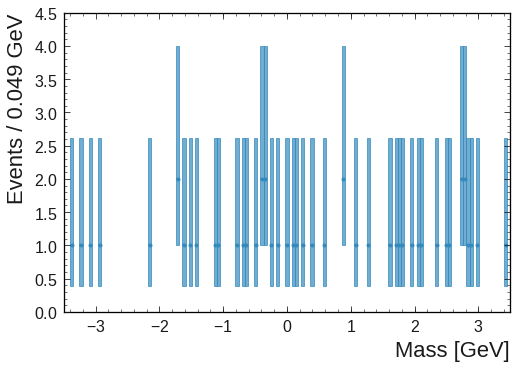

In [9]:
b2plot.errorbar(xx, box=True)
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV',root_style=1)

# Several Distrtibutions

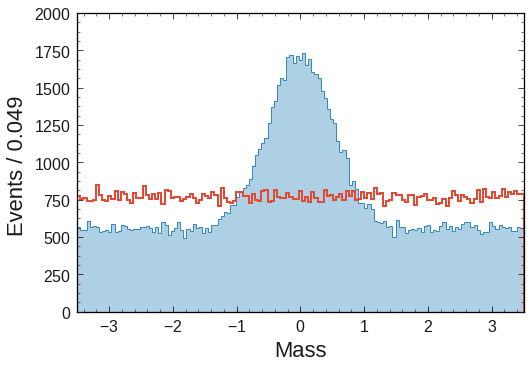

In [10]:
b2plot.hist(df.mass,  style=0,)

b2plot.hist(df1.mass,  lw=2)

b2plot.xlim()
b2plot.labels("Mass", "Events",'' )

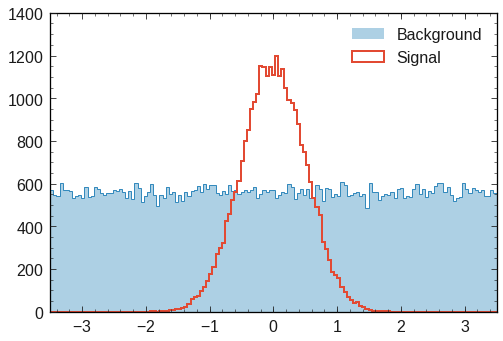

In [11]:
b2plot.sig_bkg_plot(df, "mass", 'sig')

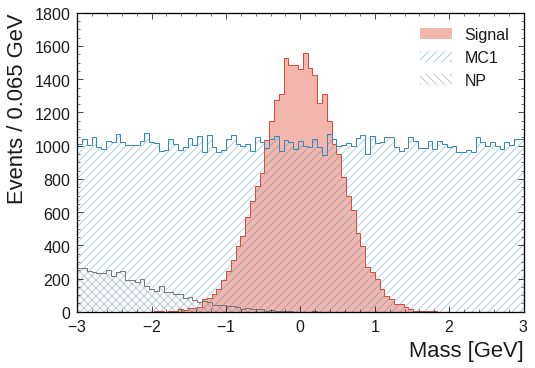

In [12]:
b2plot.figure()
b2plot.hist(df[df.sig==1].mass,  style=0, color=0, range=(-3,3), label='Signal')
b2plot.hist(df1.mass,  style=1, color=1, label='MC1')
b2plot.hist(np.random.normal(-3,1, 10000), style=2, color=3, label='NP')
b2plot.xlim()
plt.legend()
b2plot.labels("Mass", "Events",'GeV' ,1)

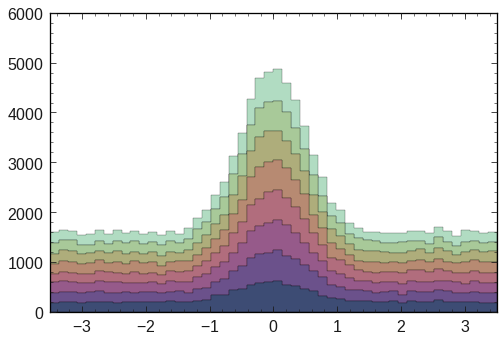

In [13]:
b2plot.stacked(df, "mass", 'exp', bins=50, color=b2plot.b2helix(8), lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

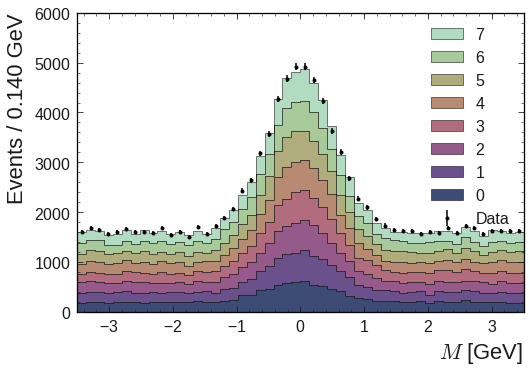

In [16]:
b2plot.stacked(df, "mass", 'exp', bins=50, color=b2plot.b2helix(8), label=range(8))
b2plot.errorbar(df.mass.values, color='black', weights=np.random.normal(1.01,0.9, len(df)), label="Data")
b2plot.xlim()
plt.legend()
b2plot.labels("$M$", "Events", 'GeV', 1)

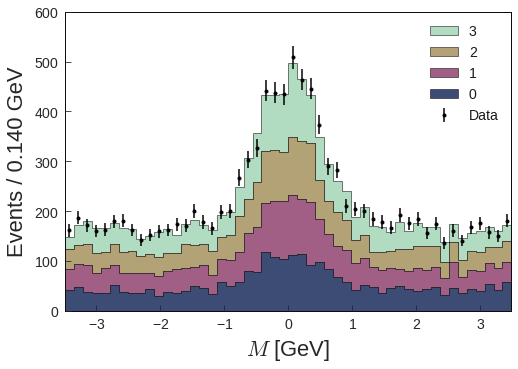

In [98]:
with plt.style.context(('belle2_modern')):
    b2plot.stacked(df, "mass", 'exp', bins=50, color=b2plot.b2helix(4), label=range(4))
    b2plot.errorbar(df.mass.values, color='black', weights=np.random.normal(1.01,0.9, len(df)), label="Data")
    b2plot.xlim()
    plt.legend()
    b2plot.labels("$M$", "Events", 'GeV', 0)

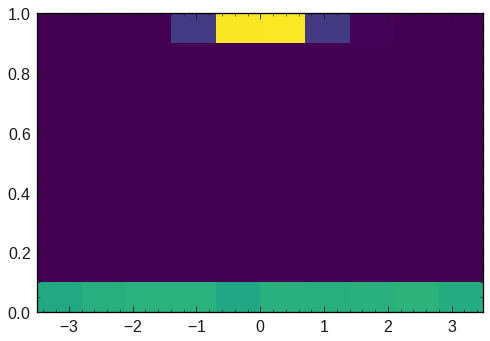

In [51]:
r = plt.hist2d(df.mass, df.sig)

In [55]:
cmax = np.max(r[0])

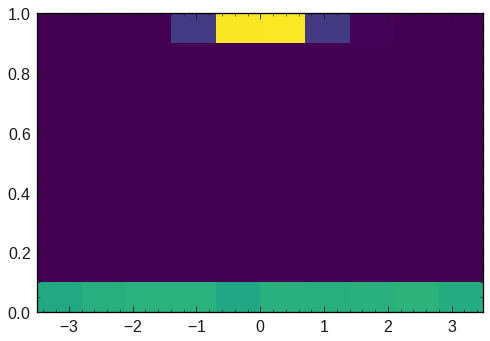

In [56]:
r = plt.hist2d(df.mass, df.sig, cmax=cmax)

In [50]:
import root_pandas

Welcome to JupyROOT 6.08/06


In [ ]:
df_sig = df[['coms']]

df_sig.to_root('sig.root', 'treeame')